# <span style='color:Blue'>Web Traffic Time Series Forecasting

# --------------------------------------------------------------------------------------------------------

### So, lets start by addressing the elephant in the room. What is Time Series Forcasting?

<span style='background :#e6eeff' >Time series forecasting uses information regarding historical values and associated patterns to predict future activity. Most often, this relates to trend analysis, cyclical fluctuation analysis, and issues of seasonality. As with all forecasting methods, success is not guaranteed.

### <span style='color:Green'> Confused? Let me try and elaborate.

<span style='background :#e6eeff' >The conventional analysis also known as cross sectional analysis looks at a single point in time, which is useful for comparing and analyzing the effect of different factors on one another or describing a sample. Time series involves repeated sampling of the same data over time.Making predictions about the future is called extrapolation in the classical statistical handling of time series data.More modern fields focus on the topic and refer to it as time series forecasting

<span style='background :#e6eeff' >The purpose of time series analysis is generally twofold: to understand or model the stochastic mechanisms that gives rise to an observed series and to predict or forecast the future values of a series based on the history of that series

### <span style='color:Green'> How Do You Analyze Time Series Data?

<span style='background :#e6eeff' >Statistical techniques can be used to analyze time series data in two key ways: to generate inferences on how one or more variables affect some variable of interest over time, or to forecast future trends. 

### <span style='color:Green'> What Are Some Examples of Time Series?

<span style='background :#e6eeff' >A time series can be constructed by any data that is measured over time at evenly-spaced intervals. Historical stock prices, earnings, GDP, or other sequences of financial or economic data can be analyzed as a time series.

### <span style='color:Green'> Now lets come to web traffic, Why is it important to forcast web trafic?

1)<span style='background :#ffe6f0' >To understand the trends in the future from the past data

2)<span style='background :#ffe6f0' > To determine the server capacity of their website

3)<span style='background :#ffe6f0' > To understand what we as a society are interested in, by analyzing the pages visited by users across the globe it would be easier to understand where we are heading to.

4)<span style='background :#ffe6f0' > To determine how much a particular site is visited to know what is the conversion rate.



###  <span style='color:Green'>It is said forcasting time series data is one of the most challenging task that analysts face. Think, why is it linke that?

<span style='background :#ffe6f0' >What makes it a challenging task is the source of data, think about Wikipedia, the visits to Wikipedia comes from users across the globe, that is a hugeeeeeeeeeee chunk of data and therefore it is really hard to process and interpret since it keep son changing countiniously

### <span style='color:Green'> About the dataset

#### File descriptions



train_.csv - contains traffic data. This a csv file where each row corresponds to a particular article and each column correspond to a particular date. Some entries are missing data. The page names contain the Wikipedia project (e.g. en.wikipedia.org), type of access (e.g. desktop) and type of agent (e.g. spider). In other words, each article name has the following format: 'name_project_access_agent' (e.g. 'AKB48_zh.wikipedia.org_all-access_spider').

key_.csv - gives the mapping between the page names and the shortened Id column used for prediction

Now let us go ahead and explore what this dataset has to offer for us, let us see what insights we can draw and what mysteries we can solve.

<span style='color:Green'>Now lets proceed to see what trends that data follows, since it is a huge dataset the number of visualizations that we can plot by including the entire data is limited, let's see what we can do.

## <span style='color:bLUE'> DATA ANALYSIS AND VISUALIZATIONS 

In [1]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import calendar

%matplotlib inline
import matplotlib.pyplot as plt

import plotly.graph_objs as go


In [2]:
train_df = pd.read_csv("train_1.csv")
key_df = pd.read_csv("key_1.csv")

In [3]:
train_df.head(3)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0


In [4]:
key_df.head(3)

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c


In [5]:
print("Train--- ", train_df.shape)
print("Key----- ", key_df.shape)

Train---  (145063, 551)
Key-----  (8703780, 2)


We can see that the page names are separated into sections using hyphen into site, access type and agent. Therefore it would be better to split them into separate sections for ease of analysis.

In [6]:
page= pd.DataFrame([i.split("_")[-3:] for i in train_df["Page"]])
page.columns = ["Site", "Access_Type", "Agent"]
page.describe()

,Site,Access_Type,Agent
count,145063,145063,145063
unique,9,3,2
top,en.wikipedia.org,all-access,all-agents
freq,24108,74315,110150


<span style='background :#ffe6f0' >We can see that even if there are huge number of data in each column, the number of unique values are quite less and are extractable, so let's explore the unique values.

In [7]:
site_column = list(page['Site'].unique())
access_column =list(page['Access_Type'].unique())
agents_column= list(page['Agent'].unique())

In [8]:
print(site_column)
print('-----------------------------------------------------------------------------------------------------------------------')
print(access_column)
print('-----------------------------------------------------------------------------------------------------------------------')
print(agents_column)

['zh.wikipedia.org', 'fr.wikipedia.org', 'en.wikipedia.org', 'commons.wikimedia.org', 'ru.wikipedia.org', 'www.mediawiki.org', 'de.wikipedia.org', 'ja.wikipedia.org', 'es.wikipedia.org']
-----------------------------------------------------------------------------------------------------------------------
['all-access', 'desktop', 'mobile-web']
-----------------------------------------------------------------------------------------------------------------------
['spider', 'all-agents']


Now let's merge the newly formed dataset into our train dataset

### <span style='color:Green'> Is Traffic Influenced by Page Language?

<span style='background : #f5ccff' >Lets see among the pages that are visited, which language stands out.
For that we have to create a separate column to specify the language of the page.
You can see from the site column in the page data frame, we can observe that the first two letters represent the language of the page, If there is a way by which this informnation can be extracted then our analysis process will be easier.

Since the language is represented by two letter we can extract it by using regular expressions.

In [9]:
import re
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res[0][0:2]
    return 'na'

<span style='background : #f5ccff' >Observe the function defined above.The function takes a page as a parameter and searches the page for a string starting with two letters followed by .wikipedia.org.  If there is such a string then the first two letters is filtered out, else na(not available) is returned.

In [10]:
train_df['lang'] = train_df.Page.map(get_language)
#Keeping a language column in the page dataframe as well
page['lang'] = train_df.Page.map(get_language)

Text(0.5, 1.0, 'Language - distribution')

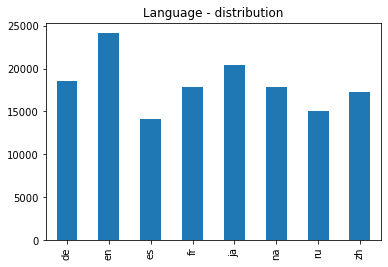

In [11]:


page["lang"].value_counts().sort_index().plot.bar().set_title('Language - distribution')



The above plot shows the language distribution in the dataframe.

Now let us count the occurances of each language in the data frame. For that lets use a counter object from collections.

In [12]:
from collections import Counter

print(Counter(train_df.lang))

Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'na': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


<span style='background : #f5ccff' >There are 7 languages plus the media pages. The languages used here are: English, Japanese, German, French, Chinese, Russian, and Spanish. This will make any analysis of the URLs difficult since there are four different writing systems to be dealt with (Latin, Cyrillic, Chinese, and Japanese). Here, we will create dataframes for the different types of entries. Then we will  calculate the sum of all views. 

In [13]:
lang = {}
lang['en'] = train_df[train_df.lang=='en'].iloc[:,0:-1]
lang['ja'] = train_df[train_df.lang=='ja'].iloc[:,0:-1]
lang['de'] = train_df[train_df.lang=='de'].iloc[:,0:-1]
lang['na'] = train_df[train_df.lang=='na'].iloc[:,0:-1]
lang['fr'] = train_df[train_df.lang=='fr'].iloc[:,0:-1]
lang['zh'] = train_df[train_df.lang=='zh'].iloc[:,0:-1]
lang['ru'] = train_df[train_df.lang=='ru'].iloc[:,0:-1]
lang['es'] = train_df[train_df.lang=='es'].iloc[:,0:-1]

In [14]:
sums = {}
for key in lang:
    sums[key] = lang[key].iloc[:,1:].sum(axis=0) / lang[key].shape[0]

<span style='background :#ffe6f0' >In the above cell we can see that a new dictionary is created called sums and then total sum of views for each language is appended to the dictionary with the language as keys.

<span style='background :#ffe6f0' >Creating a list of numbers in the range of number of rows belonging to largest language. Plot a figure with the days in days list in x axis and each key value in sums dictionary in y axis.

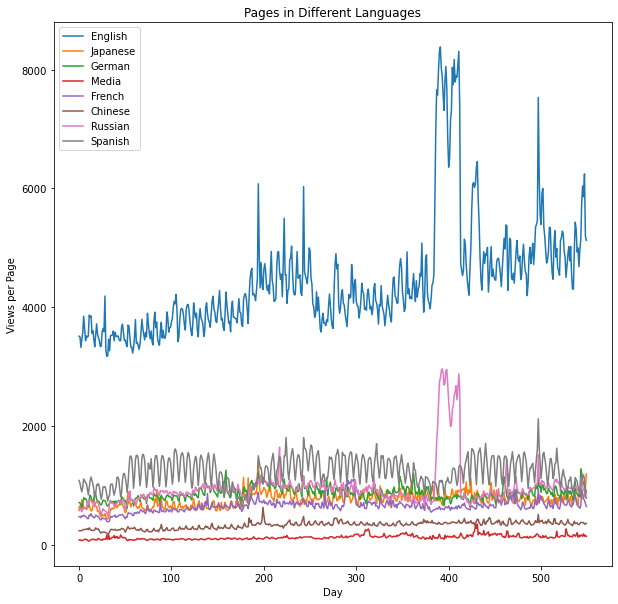

In [15]:
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )
    
plt.legend()
plt.show()

<span style='background :#e6ffff' >English shows much larger views per page, it may be because of the fact that Wikipedia is a US based page. We can see a spike in page views for english and Russian pages around the day 400, english shows more spikes later.It is also interesting to note that the Spanish data is almost periodic in nature.

<span style='background :#ffe6f0' >Now lets melt the dataframe into a desirable form, that is page values are treated as identifiers and the variable as date and value as the number of visits, the values and variables are unpivoted to form row values.

<span style='background :#ffe6f0' >Pandas melt() function is used to change the DataFrame format from wide to long. It’s used to create a specific format of the DataFrame object where one or more columns work as identifiers. All the remaining columns are treated as values and unpivoted to the row axis and only two columns – variable and value.

In [16]:
train_df_2=pd.read_csv("train_1.csv")

In [17]:
train=pd.melt(train_df_2[list(train_df_2.columns[-50:])+['Page']], id_vars='Page', var_name='date', value_name='Visits')

In [18]:
train.head(3)

,Page,date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2016-11-12,13.0
1,2PM_zh.wikipedia.org_all-access_spider,2016-11-12,12.0
2,3C_zh.wikipedia.org_all-access_spider,2016-11-12,6.0


<span style='background :#ffe6f0' >You can observe the above data frame and understand what pandas melting actually do, now we see is number of visits a particular page has on a particular date.Looks more convenient for analysis right?

Now lets look at the data type of each column

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253150 entries, 0 to 7253149
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Page    object 
 1   date    object 
 2   Visits  float64
dtypes: float64(1), object(2)
memory usage: 166.0+ MB


### <span style='color:Green'>We have to convert the date column to date time object for analysis since it is object type now.

In [20]:
train['date'] = train['date'].astype('datetime64[ns]')

Now we have to add a column weekend to the dataframe using the dt.dayofweek method.

<span style='background :#ffe6f0' >This code  use integer division (//) to test whether the dayofweek attribute of the DatetimeIndex is less than 5. Normally this would return just a True or False, but tacking on the astype(float) at the end returns a 1 or 0 rather than a boolean.

In [21]:
train['weekend'] = ((train.date.dt.dayofweek) // 5 == 1).astype(float)

<span style='background :#ffe6f0' >Creating a dataframe with the median/mean value of visits for each page by grouping the train dataframe on page and computing the median/mean.

In [22]:
median = pd.DataFrame(train.groupby(['Page'])['Visits'].median())
median.columns = ['median']
mean = pd.DataFrame(train.groupby(['Page'])['Visits'].mean())
mean.columns = ['mean']


<span style='background :#ffe6f0' >Join the mean and median data frame into the train data frame and set the index values to be the page column values, also create a new column weekday by filtering out the date values and applying a function on the value which returns which weekday the date belongs to.

In [23]:
train = train.set_index('Page').join(mean).join(median)
train.reset_index(drop=False,inplace=True)
train['weekday'] = train['date'].apply(lambda x: x.weekday())

<span style='background :#ffe6f0' >Feature engineering with dates, creating a year, month and day column by applying dt.year, dt.month, dt.day on the filtered out date values of the train data frame.

In [24]:
train['year']=train.date.dt.year 
train['month']=train.date.dt.month 
train['day']=train.date.dt.day

In [25]:
train.head(3)

,Page,date,Visits,weekend,mean,median,weekday,year,month,day
0,!vote_en.wikipedia.org_all-access_all-agents,2016-11-12,2.0,1.0,2.836735,2.0,5,2016,11,12
1,!vote_en.wikipedia.org_all-access_all-agents,2016-11-13,2.0,1.0,2.836735,2.0,6,2016,11,13
2,!vote_en.wikipedia.org_all-access_all-agents,2016-11-14,4.0,0.0,2.836735,2.0,0,2016,11,14


<span style='background :#ffe6f0' >This is the new formed data frame, observe the weekday column to understand what the weekday() function actually does.

### <span style='color:Green'> Now lets do some plotting to understand the new data frame and the data

#### <span style='color:Green'>  1) This is to plot the mean value of visits on  pages on a particular date.

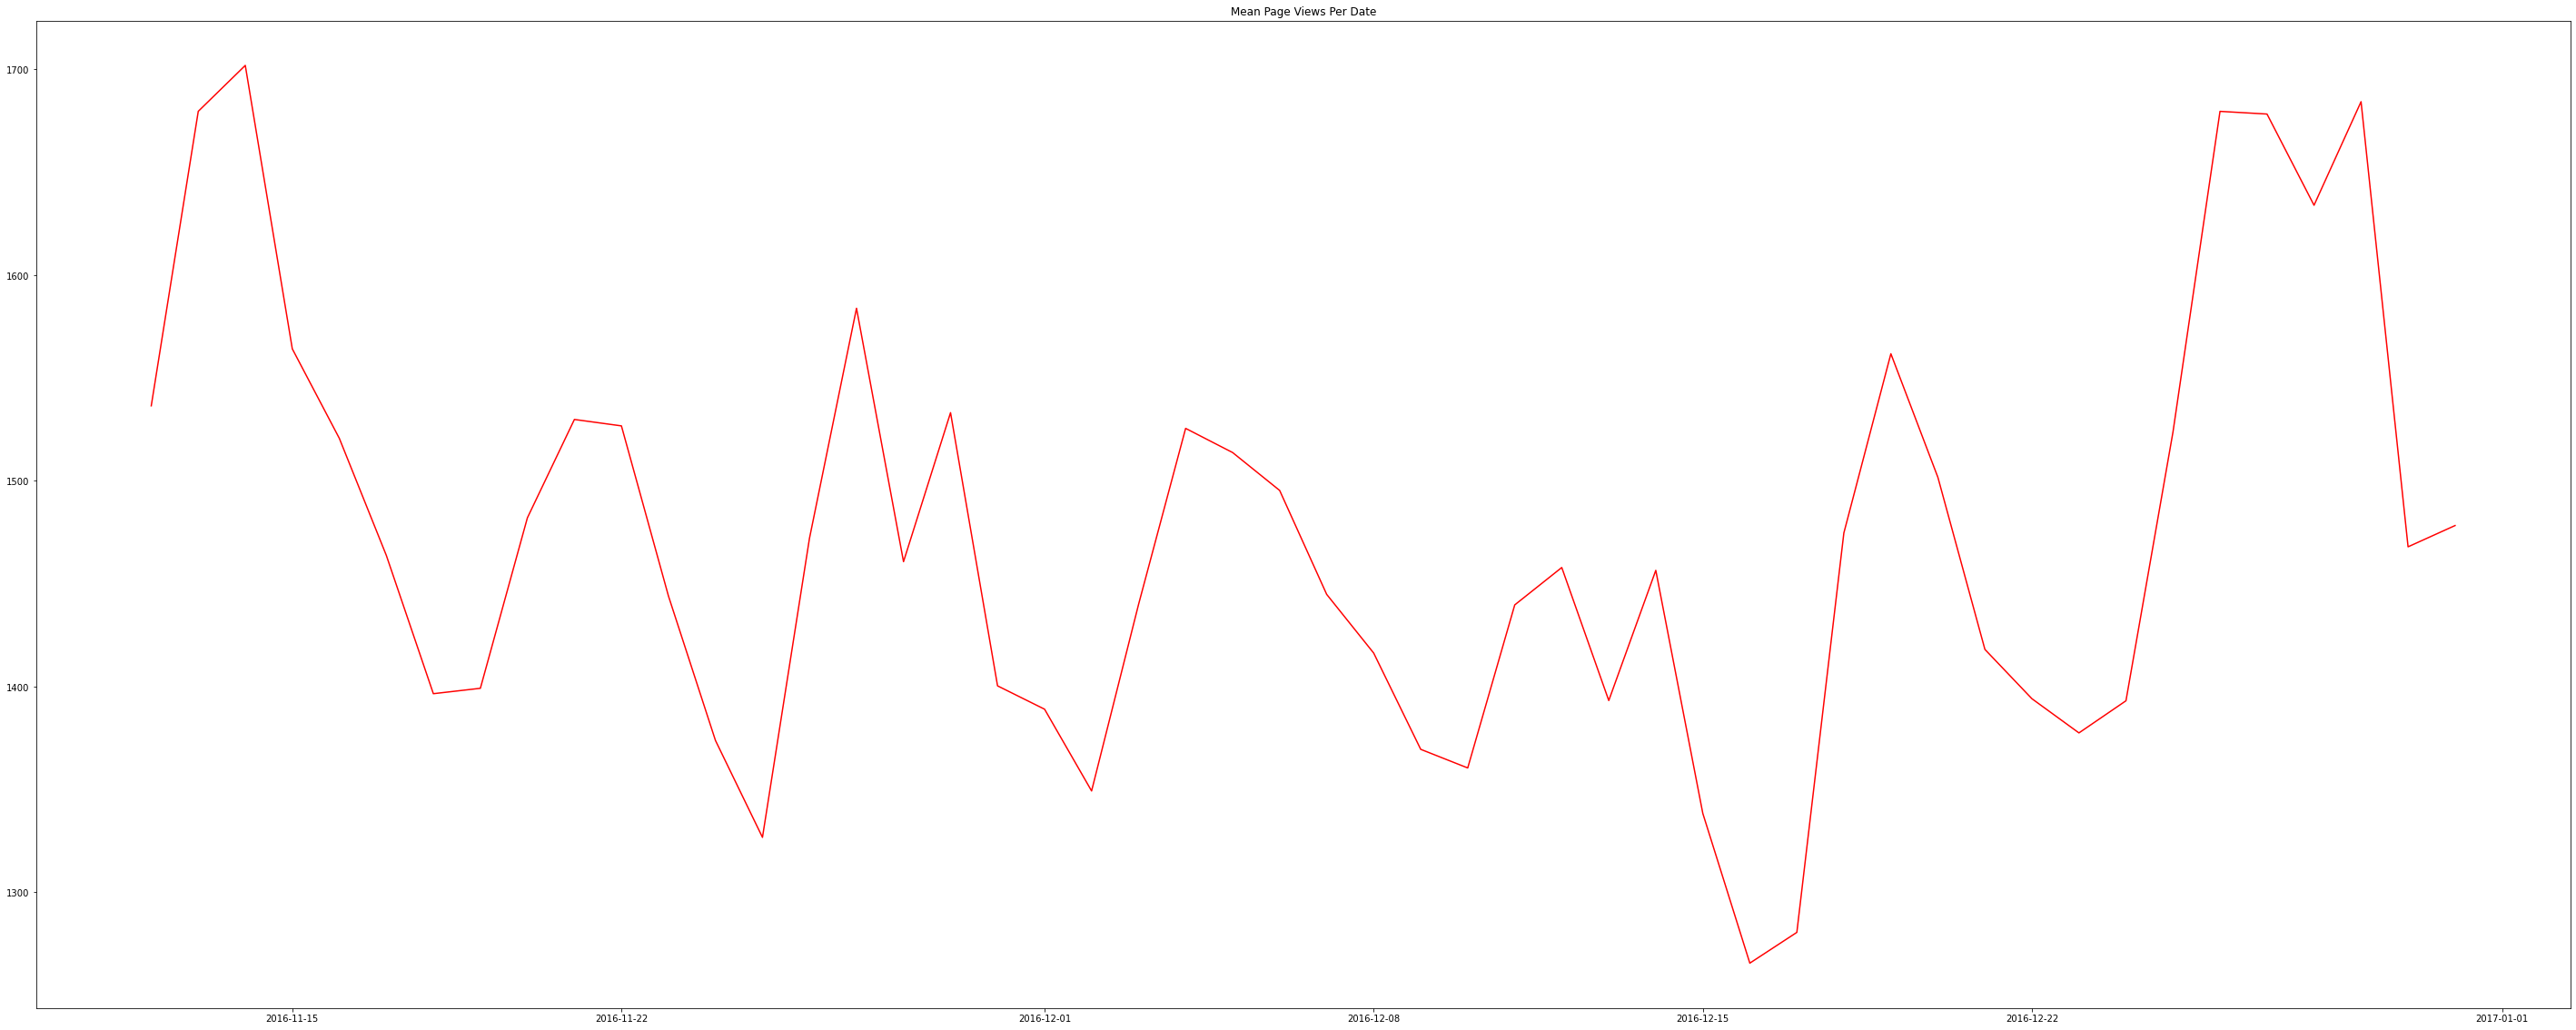

In [26]:
plt.figure(figsize=(50, 20))
mean_g = train[['Page','date','Visits']].groupby(['date'])['Visits'].mean()
plt.plot(mean_g,c='red')
plt.title('Mean Page Views Per Date')
plt.show()

In [27]:
train[['Page','date','Visits']].groupby(['date'])['Visits'].mean().head(3)

date
2016-11-12    1536.471757
2016-11-13    1679.630589
2016-11-14    1701.941831
Name: Visits, dtype: float64

<span style='color:Green'>See the above code to understand what the code in the plot returns.

<span style='background :#ffe6f0' >We can see that the mean visit data dosent vary periodically and has unexpected peaks and drops.We see that the biggest beek occurs before 2016-11-15 and a very deep drop occurs between 2016-11-22 and 2016-12-01

#### <span style='color:Green'>  2) This is to plot the median value of visits on  pages on a particular date.


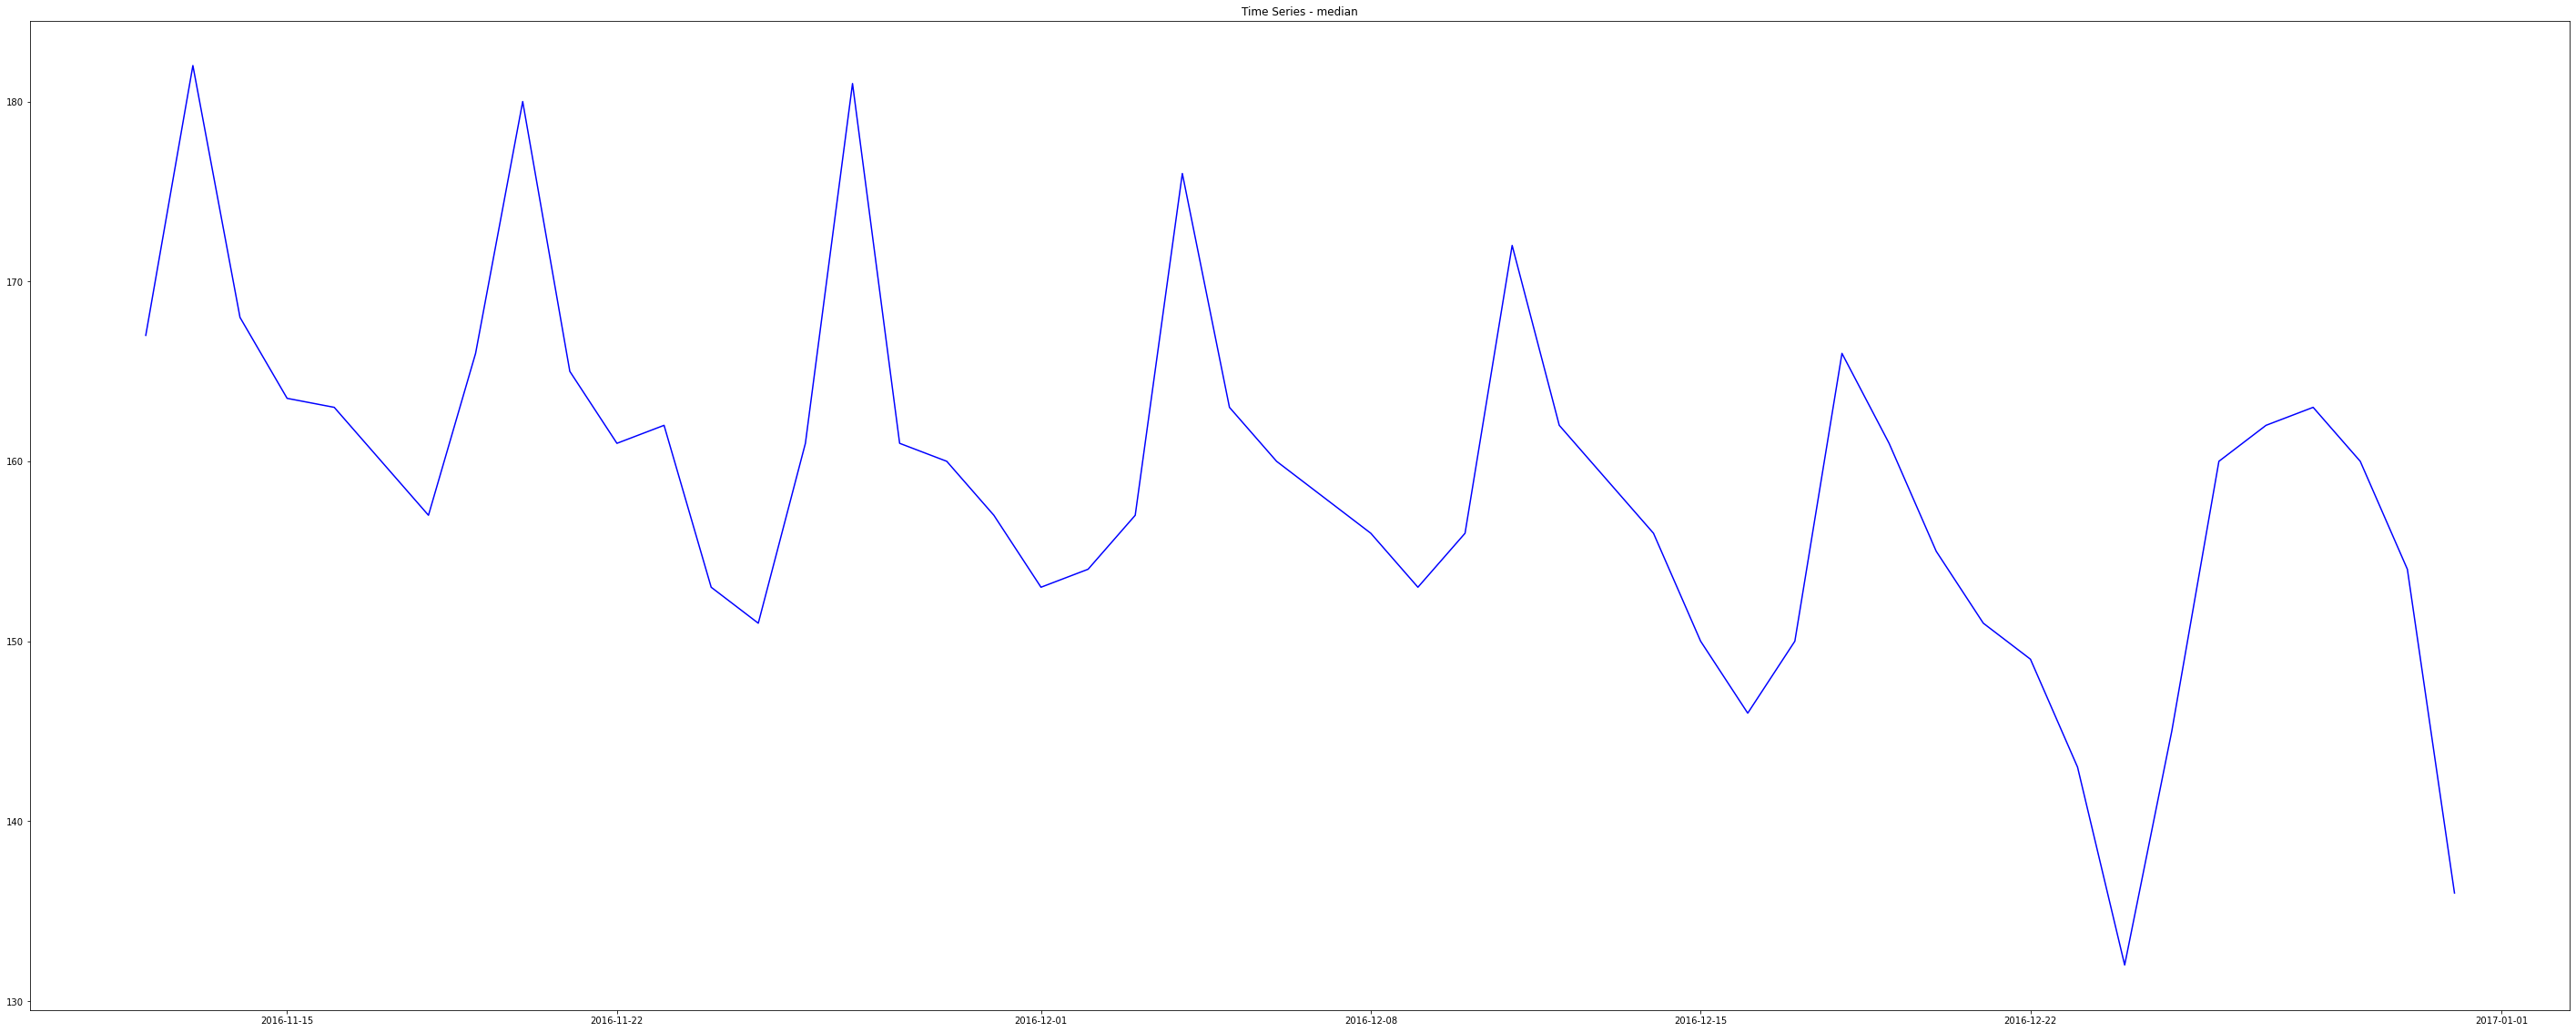

In [28]:
plt.figure(figsize=(50, 20))
median_g = train[['Page','date','Visits']].groupby(['date'])['Visits'].median()
plt.plot(median_g, color = 'b')
plt.title('Time Series - median')
plt.show()

### <span style='color:Green'>This plot follows a similar concept but shows median values instead.

# -------------------------------------------------------------------------------------------------------- 

# MODELS

##  <span style='color:Green'>Types of time series analysis

<span style='background :#e6ffff' >Classification:</span> Identifies and assigns categories to the data.
    
<span style='background :#e6ffff' >Curve fitting: </span>Plots the data along a curve to study the relationships of variables within the data.
    
<span style='background :#e6ffff' >Descriptive analysis:</span> Identifies patterns in time series data, like trends, cycles, or seasonal variation.

<span style='background :#e6ffff' >Explanative analysis:</span> Attempts to understand the data and the relationships within it, as well as cause and effect.

<span style='background :#e6ffff' >Exploratory analysis:</span> Highlights the main characteristics of the time series data, usually in a visual format.

<span style='background :#e6ffff' >Forecasting:</span> Predicts future data. This type is based on historical trends. It uses the historical data as a model for future
data, predicting scenarios that could happen along future plot points.

<span style='background :#e6ffff' >Intervention analysis:</span> Studies how an event can change the data.

    
    

## <span style='color:Green'> Primary techniques and tools for time series analysis

<span style='background : #f5ccff' >Box-Jenkins ARIMA models:</span> These univariate models are used to better understand a single time-dependent variable, such as temperature over time, and to predict future data points of variables. These models work on the assumption that the data is stationary. Analysts have to account for and remove as many differences and seasonality in past data points as they can. Thankfully, the ARIMA model includes terms to account for moving averages, seasonal difference operators, and autoregressive terms within the model.

<span style='background : #f5ccff' >Box-Jenkins Multivariate Models:</span>  Multivariate models are used to analyze more than one time-dependent variable, such as temperature and humidity, over time.

<span style='background : #f5ccff' >Holt-Winters Method:</span>  The Holt-Winters method is an exponential smoothing technique. It is designed to predict outcomes, provided that the data points include seasonality.

#  --------------------------------------------------------------------------------------------------------

## <span style='color:Green'> PROPHET

## What is Prophet?

<span style='background : #f5ccff' >“Prophet” is an open-sourced library available on R or Python which helps users analyze and forecast time-series values released in 2017. With developers’ great efforts to make the time-series data analysis be available without expert works, it is highly user-friendly but still highly customizable, even to non-expert users.

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data.

This is a link to a fairly good medium article about prophet, do give it a read if you are interested.

https://medium.com/swlh/facebook-prophet-426421f7e331

Refer this article if you have issues with prophet iinstallations I 

https://github.com/facebook/prophet/issues/892

Another good article on Prophet.

https://analyticsindiamag.com/comprehensive-guide-to-facebooks-prophet-with-python-code/

<span style='background : #f5ccff' >SPECIALITIES 

1) Accurate and fast.

2) Fully automatic

3) Tunable forecasts

## The Prophet Forecasting Model

The Prophet uses a decomposable time series model with three main model components: trend, seasonality, and holidays. They are combined in the following equation:

<span style='background : #f5ccff' >y(t)=g(t) + h(t) + s(t) + Et </span>

<span style='background : #f5ccff' >g(t) </span> : piecewise linear or logistic growth curve for modeling non-periodic changes in time series

<span style='background : #f5ccff' >s(t) </span>: periodic changes (e.g. weekly/yearly seasonality)

<span style='background : #f5ccff' >h(t) </span>: effects of holidays (user provided) with irregular schedules

<span style='background : #f5ccff' >εt </span>: error term accounts for any unusual changes not accommodated by the model


In [29]:
train = pd.read_csv("train_1.csv")
keys = pd.read_csv("key_1.csv")

In [30]:
from fbprophet import Prophet

In [31]:
#Creating a new data frame means from the mean_g data frame
means =  pd.DataFrame(mean_g).reset_index(drop=False)
#Create a new column weekday in the dataframe by applying the method weekday() to the week column
means['weekday'] =means['date'].apply(lambda x: x.weekday())

#Create a string out of the date column so that the month day and year can be extracted
means['Date_str'] = means['date'].apply(lambda x: str(x))

#create new columns year,month,day in the dataframe by splitting the date string on hyphen and converting them to a list of values and add them under the column names year,month and day
means[['year','month','day']] = pd.DataFrame(means['Date_str'].str.split('-',2).tolist(), columns = ['year','month','day'])

#creating a new dataframe date by splitting the day column into 2 in the means data frame on sapce, to understand these steps look at the subsequent cells to understand how the day column looked before this step
date = pd.DataFrame(means['day'].str.split(' ',2).tolist(), columns = ['day','other'])
#modify the day column in the means data frame
means['day'] = date['day']*1




In [32]:
# This is how the page column would be if we haven't modified it 
pd.DataFrame(means['Date_str'].str.split('-',2).tolist(), columns = ['year','month','day']).head(3)

,year,month,day
0,2016,11,12 00:00:00
1,2016,11,13 00:00:00
2,2016,11,14 00:00:00


In [33]:
#This is the data frame used to modify the date column in the means data frame.
date.head(3)

,day,other
0,12,00:00:00
1,13,00:00:00
2,14,00:00:00


In [34]:
#Now drop the Date_str column which was created only to extract the day,week and year columns
means.drop('Date_str',axis = 1, inplace =True)
means.head()

,date,Visits,weekday,year,month,day
0,2016-11-12,1536.471757,5,2016,11,12
1,2016-11-13,1679.630589,6,2016,11,13
2,2016-11-14,1701.941831,0,2016,11,14
3,2016-11-15,1564.172228,1,2016,11,15
4,2016-11-16,1520.673959,2,2016,11,16


In [35]:
pip install pystan==2.19.1.1

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install fbprophet==0.6.0

  Using cached fbprophet-0.6.tar.gz (54 kB)
  Created wheel for fbprophet: filename=fbprophet-0.6-py3-none-any.whl size=511148 sha256=9fd2efdde36b5dad04184ea011c7224194d74b8b2247b124075c9f17825c907bNote: you may need to restart the kernel to use updated packages.

  Stored in directory: c:\users\91984\appdata\local\pip\cache\wheels\ea\0f\9b\c552c9098c5974a9968548eea45adbacaac276327f26724ae6
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.68
    Uninstalling cmdstanpy-0.9.68:
      Successfully uninstalled cmdstanpy-0.9.68
  Attempting uninstall: fbprophet
    Found existing installation: fbprophet 0.7.1
    Uninstalling fbprophet-0.7.1:
      Successfully uninstalled fbprophet-0.7.1


# -------------------------------------------------------------------------------------------------------

### Methods used here in prophet

###  <span style='background : #f5ccff'>1) make_future_dataframe:</span> Make dataframe with future dates for forecasting.

<span style='color:Green'>make_future_dataframe(m, periods, freq = "day", include_history = TRUE)

Arguments
    
<span style='background : #f5ccff' >m:</span> Prophet model object.

<span style='background : #f5ccff' >periods	:</span> Int number of periods to forecast forward.

<span style='background : #f5ccff' >freq :</span> 'day', 'week', 'month', 'quarter', 'year', 1(1 sec), 60(1 minute) or 3600(1 hour).

<span style='background : #f5ccff' >include_history	:</span> Boolean to include the historical dates in the data frame for predictions.

####  <span style='background : #f5ccff'>2) prophet_plot_components: </span>
Plot the components of a prophet forecast." Prints a ggplot2 (GGplot2 is like a R grammar system for graphics where the syntax consists various parts of graphics and you can build graphs using this syntax provided by ggplot2. Its like mapping various attributes of graphs in R, it addresses various components of graphs and stitch them together to a build complete chart.) with whichever are available of: trend, holidays, weekly seasonality, yearly seasonality, and additive and multiplicative extra regressors.



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


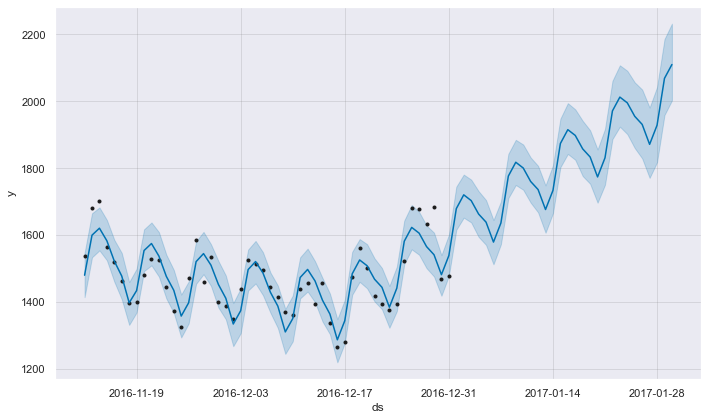

In [37]:
import seaborn as sns
sns.set(font_scale=1) 

#Filter out the date and visits column from the means data frame
date_index = means[['date','Visits']]

#Set index to date
date_index = date_index.set_index('date')
#create a new data frame which is a copy of the date_index data frame
prophet = date_index.copy()
prophet.reset_index(drop=False,inplace=True)
prophet.columns = ['ds','y']

#Create an instance of Prophet
m = Prophet()
#Fit the prophet data frame
m.fit(prophet)
#Make future predictions
future = m.make_future_dataframe(periods=30,freq='D')
forecast = m.predict(future)

#Plot the predictions
fig = m.plot(forecast)

 <span style='background : #f5ccff'>This is the plot of the forcast.

 <span style='background : #f5ccff'>The make_future_dataframe is one big reason why Prophet is really user friendly, because making a dataset for future prediction in time-series analysis is usually unpleasant moment because it requires datetime handling. Here with Prophet, just giving the length of future period will provide you the necessary dataframe. Another interesting feature about Prophet is that  Prophet has no problem with missing data. If you set their values to NA in the history but leave the dates in future, then Prophet will give you a prediction for their values.

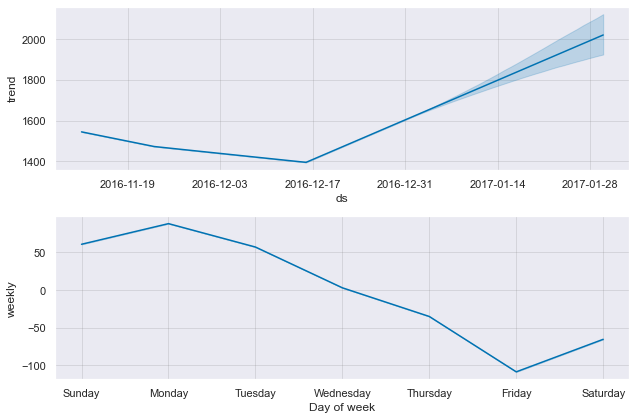

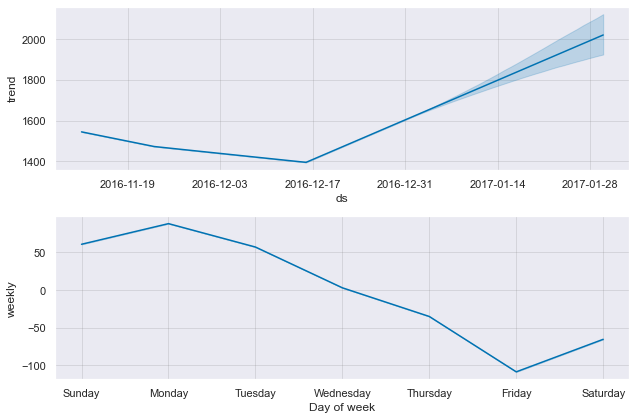

In [38]:
m.plot_components(forecast)

# --------------------------------------------------------------------------------------------------------